In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import os, copy
import time
import imp

import OMRobjects as OMR
import util_functions as fs

imp.reload(OMR)
imp.reload(fs)

%matplotlib inline

In [4]:
sheet_path = './data/You_to_me_me_to_you'
sheets = [OMR.Sheet(os.path.join(sheet_path, page_path), order=i) for i, page_path in enumerate(sorted(os.listdir(sheet_path)))]

* Sheet Object Created :: Sheet #0 :: ./data/You_to_me_me_to_you/p1.png :: (1809, 1280)
* Sheet Object Created :: Sheet #1 :: ./data/You_to_me_me_to_you/p2.png :: (1809, 1280)
* Sheet Object Created :: Sheet #2 :: ./data/You_to_me_me_to_you/p3.png :: (1809, 1280)
* Sheet Object Created :: Sheet #3 :: ./data/You_to_me_me_to_you/p4.png :: (1809, 1280)


In [5]:
sheet_sample = 0

sheets[sheet_sample].preprocess_image(threshold=200)
sheets[sheet_sample].create_system(sheets[sheet_sample])

systems = sheets[sheet_sample].systems

>>> Preprocessing Page #00 :: ./data/You_to_me_me_to_you/p1.png
* Deskewing :: PASS
* Resizing :: PASS
* Denoising :: PASS
* Inverse binary thresholding :: threshold=200
>>> Extracting systems : 5 systems
* System Object Created:: System #0 of [...you/p1.png] :: (x, y, w, h) = (83, 188, 1136, 230)
* System Object Created:: System #1 of [...you/p1.png] :: (x, y, w, h) = (79, 479, 1140, 220)
* System Object Created:: System #2 of [...you/p1.png] :: (x, y, w, h) = (80, 773, 1139, 238)
* System Object Created:: System #3 of [...you/p1.png] :: (x, y, w, h) = (83, 1070, 1136, 259)
* System Object Created:: System #4 of [...you/p1.png] :: (x, y, w, h) = (83, 1382, 1137, 247)


In [6]:
system_sample = 0

systems[system_sample].get_pixel_histogram(depend_on='row')
systems[system_sample].get_pixel_histogram(depend_on='col', grid=[0.3, 0.5, 0.7, 0.9, 0.95])

hline_pos, hthickness = systems[system_sample].get_line_info(hist_by='row')
vline_pos, vthickness = systems[system_sample].get_line_info(hist_by='col')
vline_pos, vthickness = systems[system_sample].check_bar()

systems[system_sample].reset_line_removed_image()
systems[system_sample].remove_lines(hline_pos, hthickness, direction='hor')
systems[system_sample].remove_lines(vline_pos, vthickness, direction='ver')

measures = systems[system_sample].split_into_measures(image='removed')

In [7]:
print(hline_pos)
print(hthickness)

tmp = systems[system_sample].clustering_staff()
for s in tmp:
    print(s.pos, s.thickness, s.interval, s.num_line)

[ 56  67  78  89  99 169 180 191 201 212]
[2 2 1 1 2 2 1 1 2 2]
[56 67 78 89 99] [2 2 1 1 2] 11 5
[169 180 191 201 212] [2 1 1 2 2] 11 5


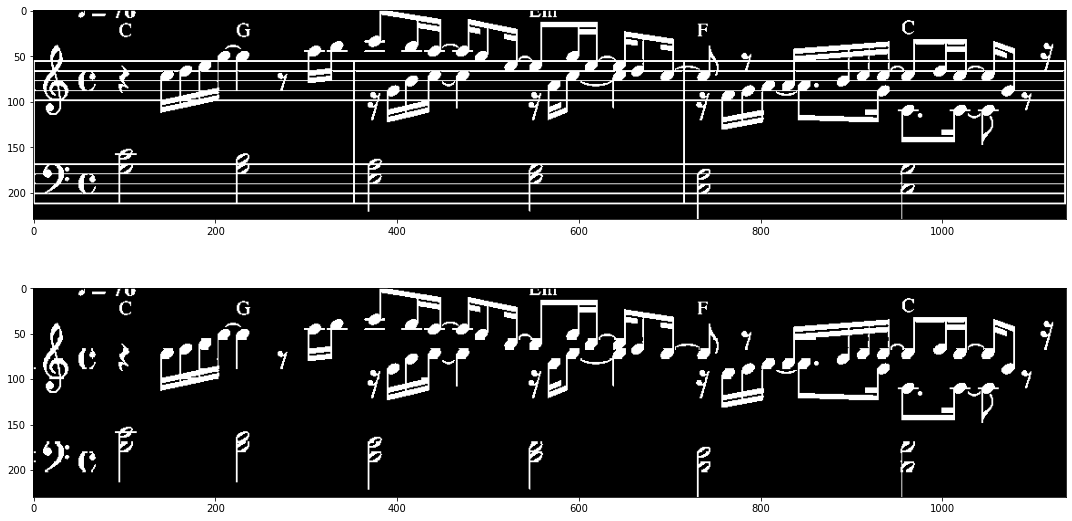

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


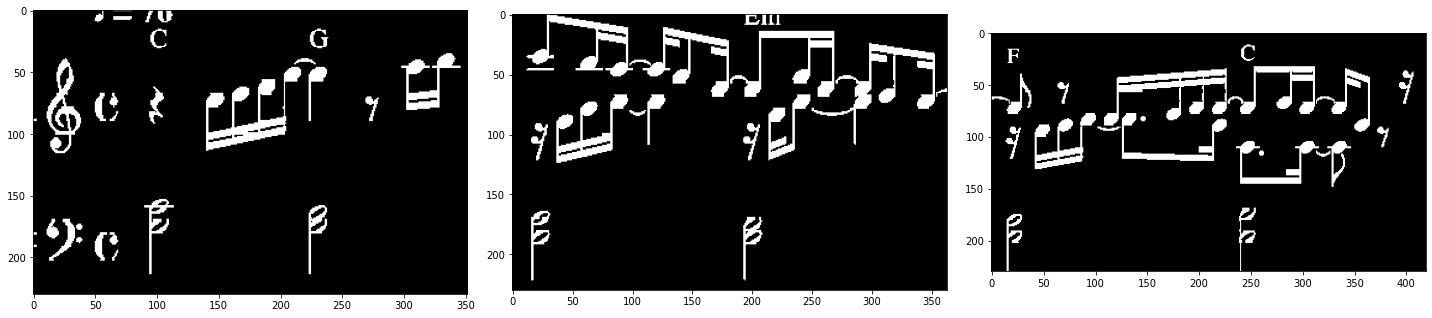

In [8]:
fig = plt.figure(figsize=(15,8))
axt = plt.subplot2grid((2, 1), (0, 0))
axt.imshow(systems[system_sample].image, cmap='gray')

axb = plt.subplot2grid((2, 1), (1, 0))
axb.imshow(systems[system_sample].image_line_removed, cmap='gray')

fig.set_tight_layout(True)
plt.show()
   
print('-='*50)

fig = plt.figure(figsize=(20,8))
for i, m in enumerate(measures):
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(m, cmap='gray')
fig.set_tight_layout(True)
plt.show()

In [9]:
template_path = {
    'Notes' : ['Full', 'Half', 'Quarter'],
    'Rests' : ['Full', 'Half', 'Quarter', 'Eighth', 'Sixteenth'],
    'KeySignatures' : ['Flat', 'Sharp', 'Natural'],
    'Times' : ['Time_4_4', 'Time_3_4', 'Time_2_4', 'Time_6_8', 'Time_8_12'], 
    'Cleves' : ['Treble', 'Bass', 'Alto']
}

#search templates
template_root = './data/symbols'
for category, sub_category_list in template_path.items():
    for sub_category in sub_category_list:
        cur_dir = os.path.join(template_root, category, sub_category)
        file_list = os.listdir(cur_dir)
        
        print(f'>>{category} - {sub_category} : {len(file_list):02d} files')
        
        file_path_list = [os.path.join(cur_dir, i) for i in sorted(file_list) if i.endswith('jpg')]
        print(*file_path_list, sep='\n')

>>Notes - Full : 00 files

>>Notes - Half : 04 files
./data/symbols/Notes/Half/Half_0926_17_15_001.jpg
./data/symbols/Notes/Half/Half_0926_17_15_003.jpg
./data/symbols/Notes/Half/Half_0926_17_16_003.jpg
./data/symbols/Notes/Half/Half_0926_17_16_005.jpg
>>Notes - Quarter : 07 files
./data/symbols/Notes/Quarter/Quarter_0014_16_00_000.jpg
./data/symbols/Notes/Quarter/Quarter_0014_16_00_002.jpg
./data/symbols/Notes/Quarter/Quarter_0926_17_00_002.jpg
./data/symbols/Notes/Quarter/Quarter_0926_17_00_003.jpg
./data/symbols/Notes/Quarter/Quarter_0926_17_00_006.jpg
./data/symbols/Notes/Quarter/Quarter_0926_17_27_002.jpg
./data/symbols/Notes/Quarter/Quarter_0926_17_27_003.jpg
>>Rests - Full : 00 files

>>Rests - Half : 00 files

>>Rests - Quarter : 03 files
./data/symbols/Rests/Quarter/Quarter_0014_16_25_001.jpg
./data/symbols/Rests/Quarter/Quarter_0926_17_28_000.jpg
./data/symbols/Rests/Quarter/Quarter_0926_17_28_002.jpg
>>Rests - Eighth : 01 files
./data/symbols/Rests/Eighth/Eighth_0014_16_06_0

./data/symbols/Cleves/Treble/Treble_0014_16_18_000.jpg
./data/symbols/Cleves/Treble/Treble_0926_17_21_000.jpg
./data/symbols/Cleves/Treble/Treble_0926_17_21_002.jpg
(76, 29)
[  0   1   2   3   4   5   6 249 250 251 252 253 254 255]
[  0 255]


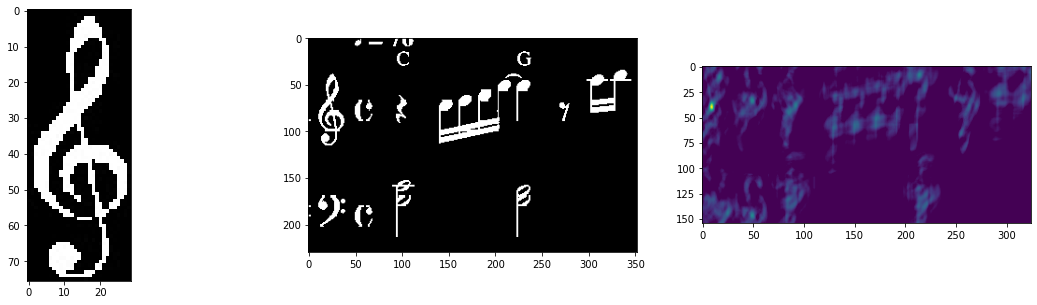

(67, 25)
[  0   1   2   3   4   5   6 249 250 251 252 253 254 255]
[  0 255]


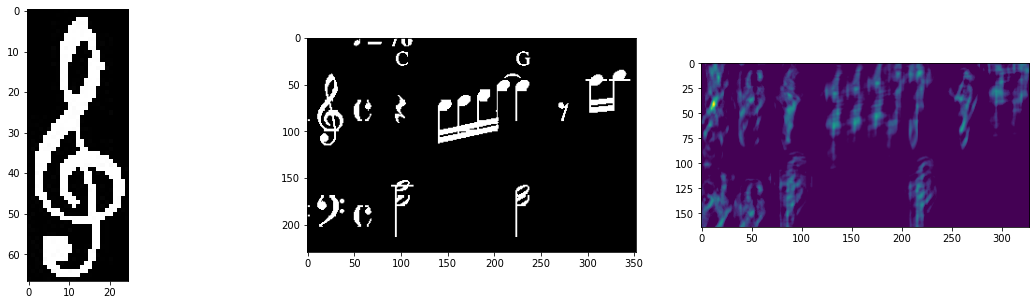

(81, 30)
[  0   1   2   3   4   5   6 247 249 250 251 252 253 254 255]
[  0 255]


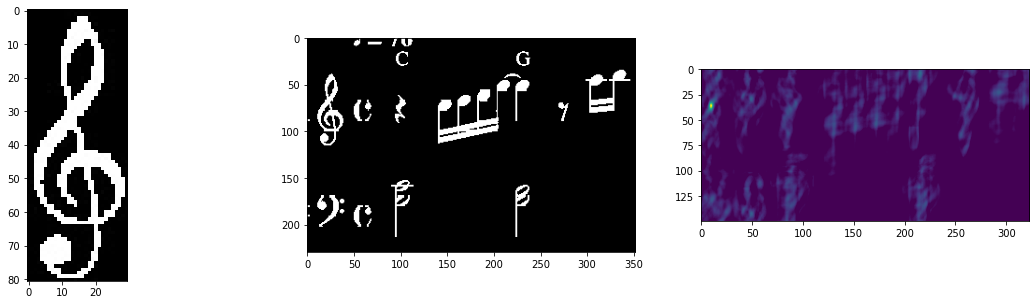

In [14]:
category_path = './data/symbols/Cleves/Treble'
template_path_list = [os.path.join(category_path, i) for i in os.listdir(category_path) if i.endswith('jpg')]
print(*template_path_list, sep='\n')

measure_sample = 0

for template_path in template_path_list:
    t = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    if True:
        t = cv2.resize(t, None, fx=0.65, fy=0.65, interpolation=cv2.INTER_NEAREST)
    print(t.shape)
    print(np.unique(t))
    print(np.unique(measures[measure_sample]))
    result = cv2.matchTemplate(measures[measure_sample], t, cv2.TM_CCOEFF_NORMED)
    result = (255*np.clip(result, 0, 1)).astype(np.uint8)
    
    fig = plt.figure(figsize=(20, 5))
    axt = fig.add_subplot(1, 3, 1)
    axt.imshow(t, cmap='gray')
    
    axo = fig.add_subplot(1, 3, 2)
    axo.imshow(measures[measure_sample], cmap='gray')
    
    axr = fig.add_subplot(1, 3, 3)
    axr.imshow(result)
    plt.show()
    break